# NEO

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test')

import dataprocess as dp


## Loading

In [2]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/neo_data_copy.csv') 
df.head()

,links,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,orbital_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000433.0,2000433.0,433 Eros (A898 PA),Eros,433,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,10.41,{'kilometers': {'estimated_diameter_min': 22.0...,False,"[{'close_approach_date': '1900-12-27', 'close_...","{'orbit_id': '659', 'orbit_determination_date'...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000719.0,2000719.0,719 Albert (A911 TB),Albert,719,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,15.59,{'kilometers': {'estimated_diameter_min': 2.02...,False,"[{'close_approach_date': '1909-08-21', 'close_...","{'orbit_id': '266', 'orbit_determination_date'...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000887.0,2000887.0,887 Alinda (A918 AA),Alinda,887,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,13.88,{'kilometers': {'estimated_diameter_min': 4.45...,False,"[{'close_approach_date': '1910-01-04', 'close_...","{'orbit_id': '488', 'orbit_determination_date'...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001036.0,2001036.0,1036 Ganymed (A924 UB),Ganymed,1036,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,9.25,{'kilometers': {'estimated_diameter_min': 37.5...,False,"[{'close_approach_date': '1910-02-25', 'close_...","{'orbit_id': '1240', 'orbit_determination_date...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001221.0,2001221.0,1221 Amor (1932 EA1),Amor,1221,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.38,{'kilometers': {'estimated_diameter_min': 0.88...,False,"[{'close_approach_date': '1900-03-08', 'close_...","{'orbit_id': '121', 'orbit_determination_date'...",False


In [3]:
df = dp.OverallProcessor(df).clean()
df.head()

,absolute_magnitude_h,is_hazardous,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,10.41,0,20083.0290749201,47112732.928149391,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
1,10.41,0,15820.1671985367,70533232.893794475,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
2,10.41,0,17340.4224662258,74687814.59975122,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
3,10.41,0,16545.797587763,53823292.394218643,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
4,10.41,0,21314.9467227704,26040971.835879446,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593


In [4]:
dftest = df.copy()
dftest.drop(columns=['minimum_orbit_intersection', 'eccentricity','inclination','perihilion_distance','aphelion_distance','estimated_diameter_average'], inplace=True)
dftest.rename(columns={'miss_distance.kilometers':'miss_distance'},inplace=True)
dftest.rename(columns={'relative_velocity.kilometers_per_hour':'relative_velocity'},inplace=True)
dftest.rename(columns={'absolute_magnitude_h':'absolute_magnitude'},inplace=True)
dftest.shape

(150464, 6)

In [5]:
dftest.head()

,absolute_magnitude,is_hazardous,relative_velocity,miss_distance,estimated_diameter_min,estimated_diameter_max
0,10.41,0,20083.0290749201,47112732.928149391,22.0067027115,49.2084832235
1,10.41,0,15820.1671985367,70533232.893794475,22.0067027115,49.2084832235
2,10.41,0,17340.4224662258,74687814.59975122,22.0067027115,49.2084832235
3,10.41,0,16545.797587763,53823292.394218643,22.0067027115,49.2084832235
4,10.41,0,21314.9467227704,26040971.835879446,22.0067027115,49.2084832235


In [6]:
df1 = df.copy()
df1 = dp.OverallProcessor(df1).adasyn()
df1.shape

(272280, 12)

In [7]:
df2 = df.copy()
df2 = dp.OverallProcessor(df2).rus()
df2.head()
print(df2.shape)

(25096, 12)


<Axes: >

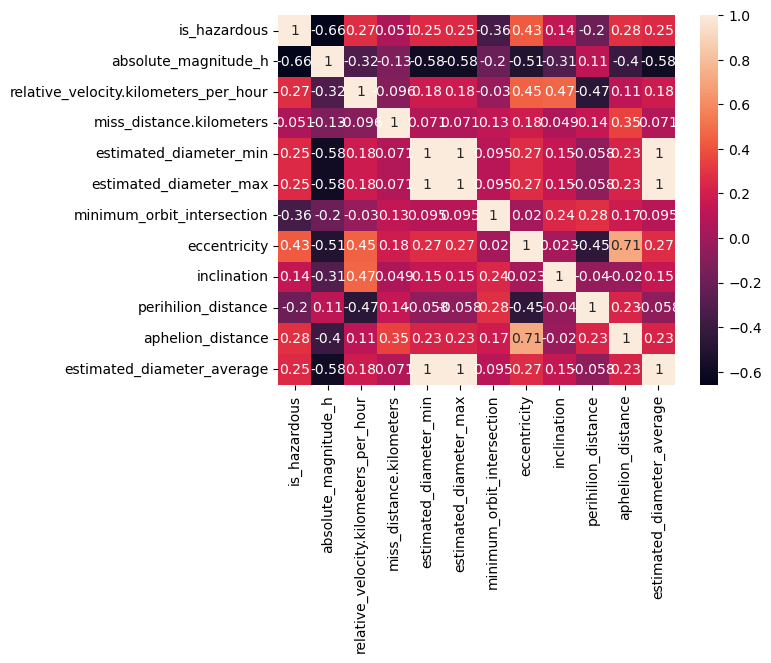

In [8]:
sns.heatmap(df1.corr(), annot=True)

In [9]:
corr_matrix = df1.corr()

corr_matrix['is_hazardous'].sort_values(ascending=False)

is_hazardous                             1.000000
eccentricity                             0.428396
aphelion_distance                        0.283194
relative_velocity.kilometers_per_hour    0.270050
estimated_diameter_min                   0.253526
estimated_diameter_average               0.253526
estimated_diameter_max                   0.253526
inclination                              0.137750
miss_distance.kilometers                 0.051268
perihilion_distance                     -0.198910
minimum_orbit_intersection              -0.356156
absolute_magnitude_h                    -0.658256
Name: is_hazardous, dtype: float64

## Tests with API Columns

### ADASYN

In [11]:
scsplit = dp.scalesplit(df1)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217824, 11), (54456, 11), (217824,), (54456,))

#### Log Regression

The accuracy score is 0.9516857646540327
 The recall score is 0.9108256507592191
 The f1 score is 0.9533320325664721
 The roc score is 0.952307580756263

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     27583
           1       0.91      1.00      0.95     26873

    accuracy                           0.95     54456
   macro avg       0.96      0.95      0.95     54456
weighted avg       0.96      0.95      0.95     54456


Cross validation score: [0.80467253 0.80053983 0.80237648 0.79833585 0.80329041]

Mean cross validation score: 0.8018430179472074



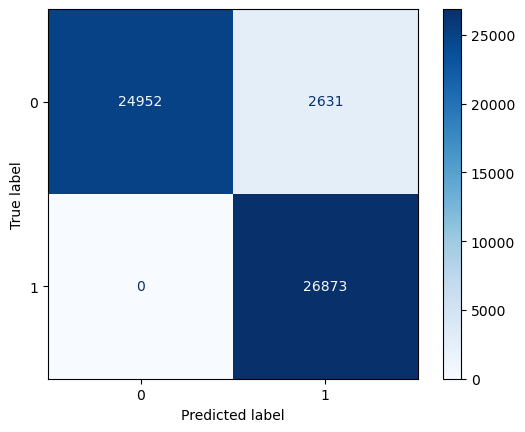

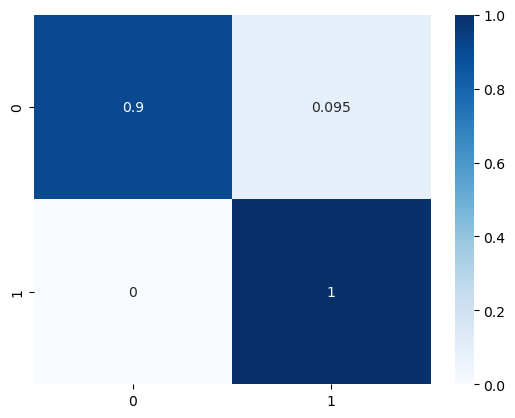

In [12]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

The accuracy score is 0.999614367562803
 The recall score is 0.9992562843968467
 The f1 score is 0.9996094113270715
 The roc score is 0.9996188518186776

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27583
           1       1.00      1.00      1.00     26873

    accuracy                           1.00     54456
   macro avg       1.00      1.00      1.00     54456
weighted avg       1.00      1.00      1.00     54456


Cross validation score: [0.99963267 0.99990817 0.99981634 0.99981634 0.9997245 ]

Mean cross validation score: 0.999779600877409



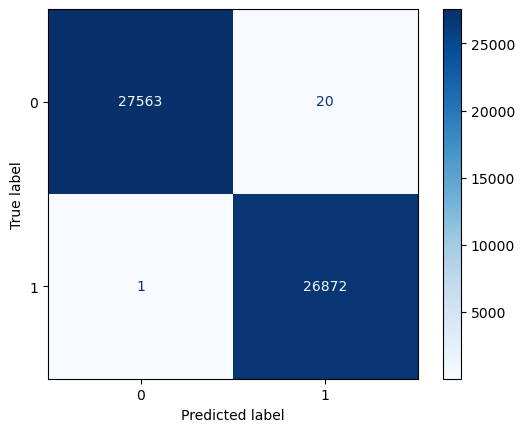

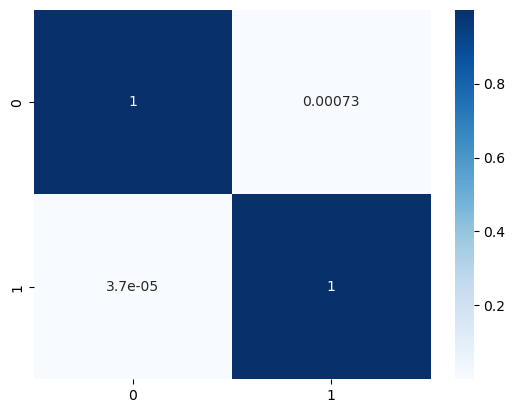

In [13]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

#### Random Forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.989863375936536
 The recall score is 0.9806435119243271
 The f1 score is 0.989825634976223
 The roc score is 0.9899833003560466

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27583
           1       0.98      1.00      0.99     26873

    accuracy                           0.99     54456
   macro avg       0.99      0.99      0.99     54456
weighted avg       0.99      0.99      0.99     54456




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [1.         1.         0.99981634 1.         1.        ]

Mean cross validation score: 0.9999632670036094



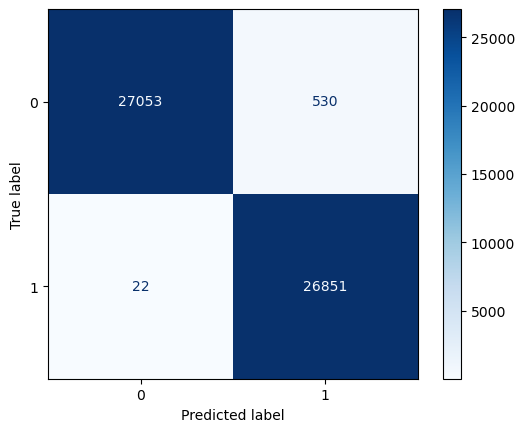

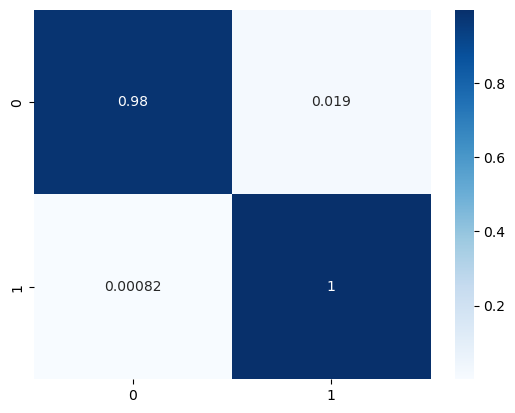

In [14]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()

### RandomUnderSampler

In [10]:
# scsplit = dp.scalesplit(df2)
# X_train, X_test, y_train, y_test = scsplit.ssplit()

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [11]:
scsplit = dp.scalesplit(df2)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20076, 11), (5020, 11), (20076,), (5020,))

#### Log Regression

The accuracy score is 0.9452191235059761
 The recall score is 0.9006143838091796
 The f1 score is 0.9477086898649933
 The roc score is 0.9456091772151899

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      2528
           1       0.90      1.00      0.95      2492

    accuracy                           0.95      5020
   macro avg       0.95      0.95      0.95      5020
weighted avg       0.95      0.95      0.95      5020


Cross validation score: [0.79581592 0.79476899 0.77583992 0.78879139 0.79975033]

Mean cross validation score: 0.7909933085043567



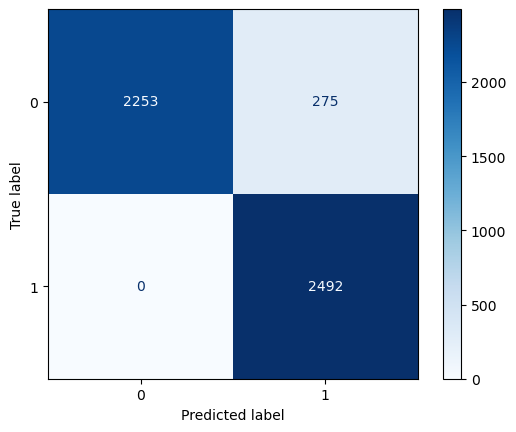

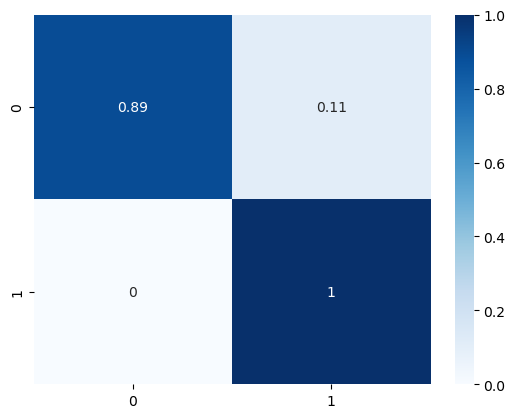

In [12]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 2000, 5000, 10000],
                         'gamma': ['scale', 'auto']},
             verbose=2)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................................C=0.001, gamma=auto; total time=  13.7s
[CV] END ...............................C=0.001, gamma=scale; total time=  13.8s
[CV] END ...............................C=0.001, gamma=scale; total time=  13.9s
[CV] END ...............................C=0.001, gamma=scale; total time=  14.0s
[CV] END ...............................C=0.001, gamma=scale; total time=  13.9s
[CV] END ................................C=0.001, gamma=auto; total time=  13.9s
[CV] END ...............................C=0.001, gamma=scale; total time=  14.1s
[CV] END ................................C=0.001, gamma=auto; total time=  14.6s
[CV] END ................................C=0.01, gamma=scale; total time=  

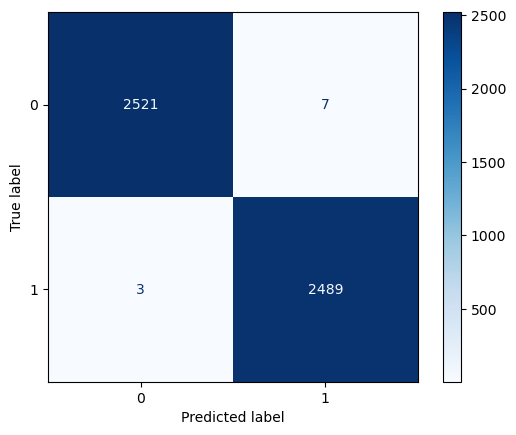

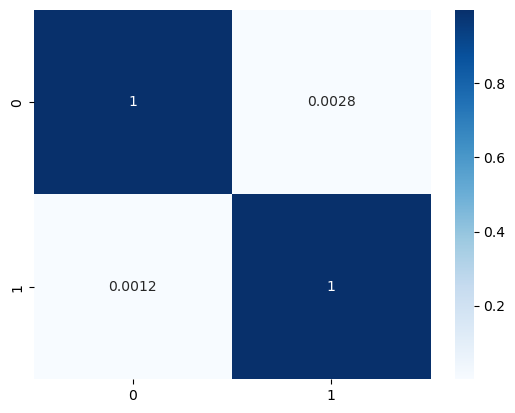

In [13]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

#### Random Forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The roc score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2528
           1       1.00      1.00      1.00      2492

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.99900398 1.         1.         1.         1.        ]

Mean cross validation score: 0.9998007960222696



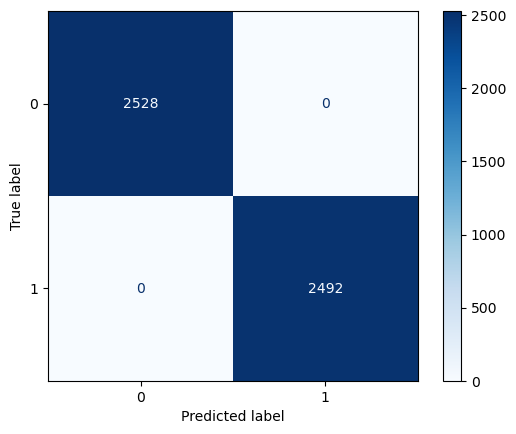

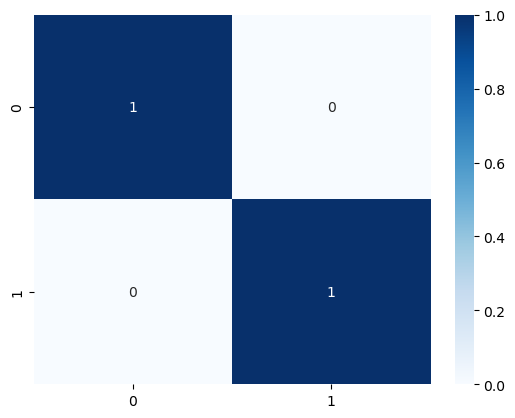

In [14]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()

### Non-Balanced

In [20]:
scsplit = dp.scalesplit(df)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120371, 11), (30093, 11), (120371,), (30093,))

#### Log Regression

The accuracy score is 0.6484896819858439
 The recall score is 0.19177872860635697
 The f1 score is 0.32183613283754325
 The roc score is 0.8082514592321357

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.76     27583
           1       0.19      1.00      0.32      2510

    accuracy                           0.65     30093
   macro avg       0.60      0.81      0.54     30093
weighted avg       0.93      0.65      0.73     30093


Cross validation score: [-3.63836129 -3.59047094 -3.64374106 -3.68021497 -3.57969956]

Mean cross validation score: -3.626497563760542



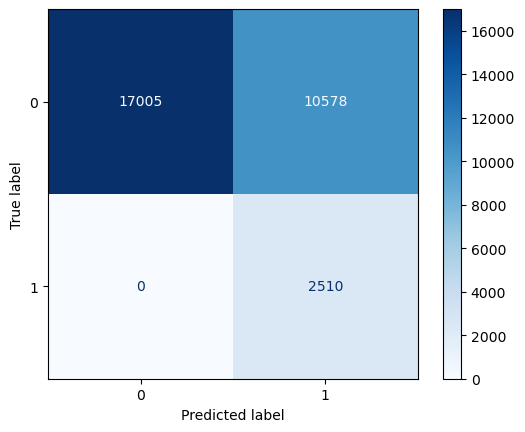

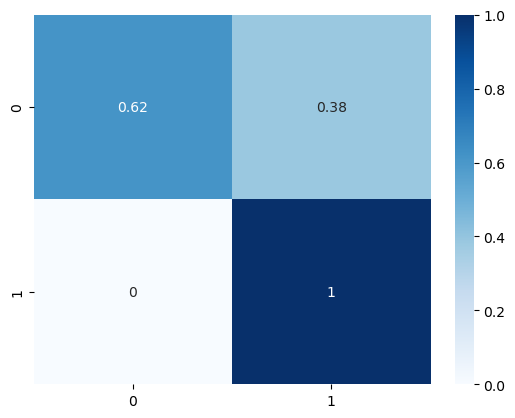

In [21]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

The accuracy score is 0.9978732595620244
 The recall score is 0.9807389937106918
 The f1 score is 0.9873367629600317
 The roc score is 0.9961237239347003

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27583
           1       0.98      0.99      0.99      2510

    accuracy                           1.00     30093
   macro avg       0.99      1.00      0.99     30093
weighted avg       1.00      1.00      1.00     30093


Cross validation score: [0.9978267  0.99782571 0.99891285 0.99565339 0.99945667]

Mean cross validation score: 0.997935065425062



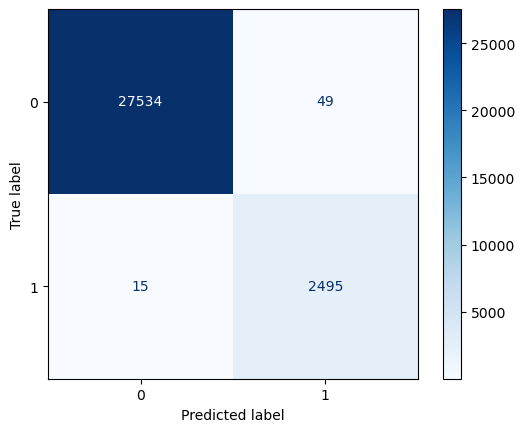

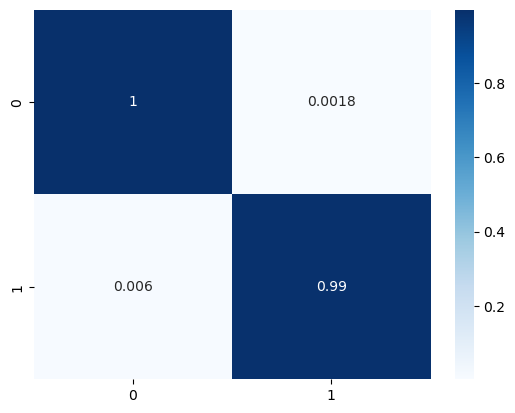

In [22]:
supportvm = dp.supportvm(X_train, X_test, y_train, y_test)
supportvm.fit()

#### Random Forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.9929551722992058
 The recall score is 0.9284116331096197
 The f1 score is 0.9591679506933745
 The roc score is 0.9925355316579456

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     27583
           1       0.93      0.99      0.96      2510

    accuracy                           0.99     30093
   macro avg       0.96      0.99      0.98     30093
weighted avg       0.99      0.99      0.99     30093




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.99945668 1.         1.         1.         1.        ]

Mean cross validation score: 0.9998913350991737



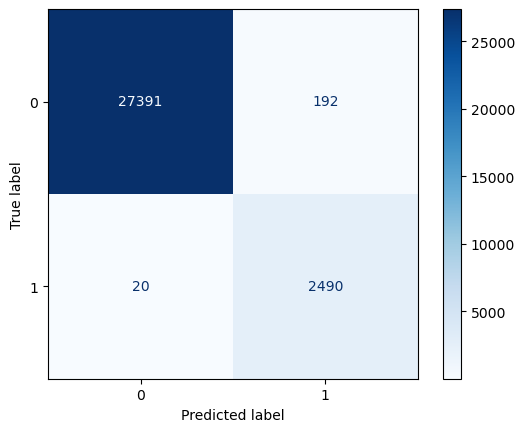

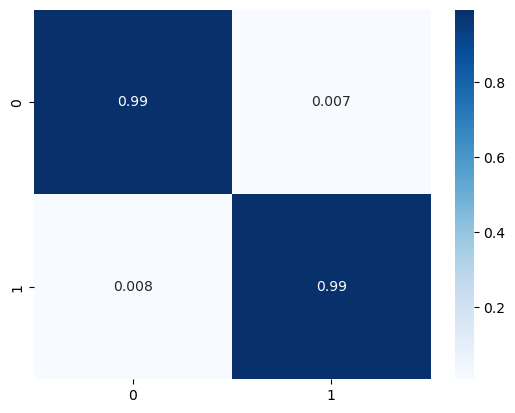

In [23]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)
randomforest.fit()

## Test with same columns

### ADASYN

In [24]:
dftest1 = dftest.copy()

dftest1 = dp.OverallProcessor(dftest1).adasyn()
dftest1.shape

(272280, 6)

In [25]:
scsplit = dp.scalesplit(dftest1)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217824, 5), (54456, 5), (217824,), (54456,))

In [13]:
X_train 

array([[-1.38066022,  0.08753181,  0.43205289,  0.95732781,  0.95732781],
       [-0.30438468, -0.04230027, -0.71110181, -0.22943549, -0.22943549],
       [-0.60769402, -0.70766734, -0.82806193,  0.16406753,  0.16406753],
       ...,
       [-0.34998958, -0.23408806, -0.09323359, -0.20875937, -0.20875937],
       [-0.2655068 ,  0.31198265,  0.13454728, -0.22008619, -0.22008619],
       [-0.77799985, -1.3418499 ,  5.22907691,  0.24433544,  0.24433544]])

#### Log Regression

The accuracy score is 0.8710702218304687
 The recall score is 0.7942563981601604
 The f1 score is 0.8847069642182702
 The roc score is 0.8722149718878437

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.85     27475
           1       0.79      1.00      0.88     26981

    accuracy                           0.87     54456
   macro avg       0.90      0.87      0.87     54456
weighted avg       0.90      0.87      0.87     54456


Cross validation score: [0.48214239 0.48306141 0.47938801 0.47360241 0.48791657]

Mean cross validation score: 0.4812221579644077



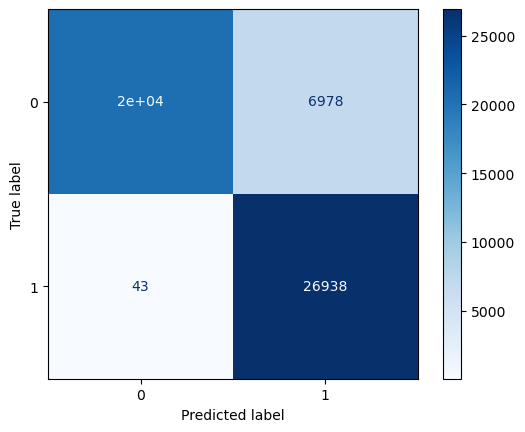

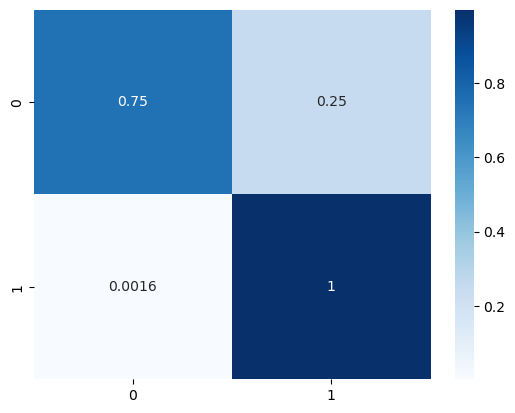

In [26]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)

supportvm.fit()

#### Random Forest

In [ ]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

### RandomUnderSampler

In [15]:
dftest2 = dftest.copy()

dftest2 = dp.OverallProcessor(dftest2).rus()
dftest2.shape

(25096, 6)

In [16]:
scsplit = dp.scalesplit(dftest2)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20076, 5), (5020, 5), (20076,), (5020,))

#### Log Regression

The accuracy score is 0.8673306772908367
 The recall score is 0.8041305796135909
 The f1 score is 0.8787768474699672
 The roc score is 0.8680524513887478

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      2528
           1       0.80      0.97      0.88      2492

    accuracy                           0.87      5020
   macro avg       0.88      0.87      0.87      5020
weighted avg       0.88      0.87      0.87      5020


Cross validation score: [0.49800598 0.49090754 0.49887768 0.4650046  0.47795607]

Mean cross validation score: 0.4861503743395287



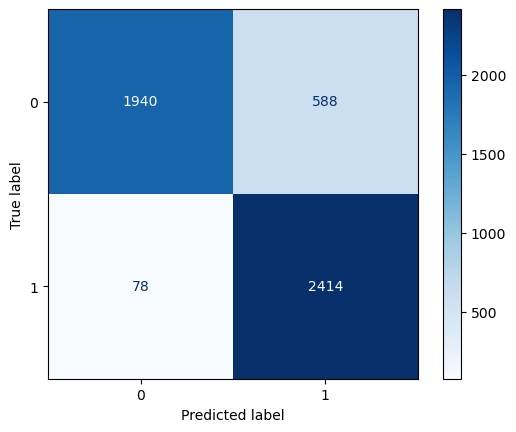

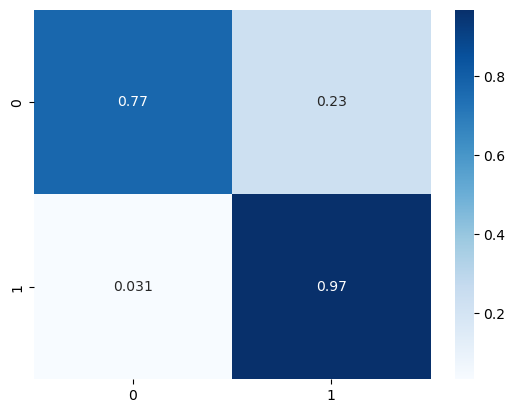

In [17]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)
supportvm.fit()

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 2000, 5000, 10000],
                         'gamma': ['scale', 'auto']},
             verbose=2)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.001, gamma=scale; total time=  11.9s
[CV] END ................................C=0.001, gamma=auto; total time=  11.8s
[CV] END ...............................C=0.001, gamma=scale; total time=  12.1s
[CV] END ................................C=0.001, gamma=auto; total time=  12.0s
[CV] END ...............................C=0.001, gamma=scale; total time=  12.1s
[CV] END ...............................C=0.001, gamma=scale; total time=  12.3s
[CV] END ................................C=0.001, gamma=auto; total time=  12.2s
[CV] END ...............................C=0.001, gamma=scale; total time=  12.6s
[CV] END ................................C=0.01, gamma=scale; total time=  

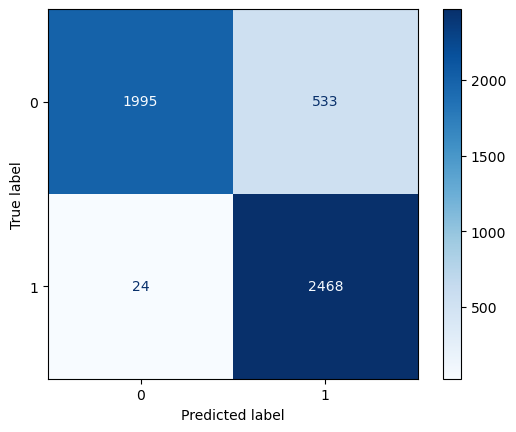

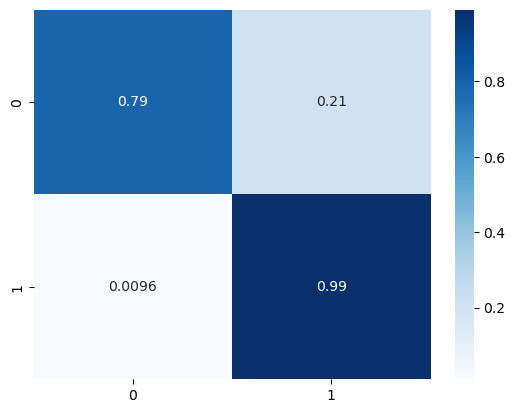

In [18]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)
supportvm.fit()

#### Random Forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.9549800796812749
 The recall score is 0.9281934996220711
 The f1 score is 0.9560140132347217
 The roc score is 0.9551977721112624

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      2528
           1       0.93      0.99      0.96      2492

    accuracy                           0.95      5020
   macro avg       0.96      0.96      0.95      5020
weighted avg       0.96      0.95      0.95      5020




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.8396408  0.83163087 0.81967567 0.84358607 0.8336234 ]

Mean cross validation score: 0.8336313628258626



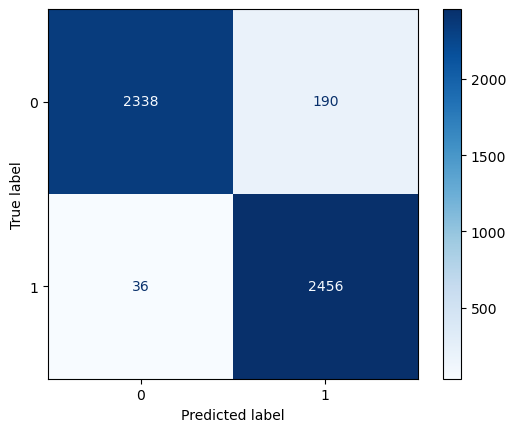

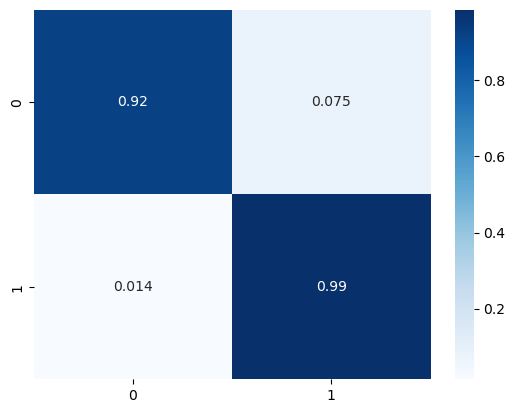

In [18]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

### SMOTE

In [33]:
dftest3 = dftest.copy()

dftest3 = dp.OverallProcessor(dftest3).smote()
dftest3.shape

(275832, 6)

In [34]:
scsplit = dp.scalesplit(dftest3)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220665, 5), (55167, 5), (220665,), (55167,))

#### Log Regression

The accuracy score is 0.8753240161690866
 The recall score is 0.8015144895878841
 The f1 score is 0.888917600697697
 The roc score is 0.8753262347009949

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86     27584
           1       0.80      1.00      0.89     27583

    accuracy                           0.88     55167
   macro avg       0.90      0.88      0.87     55167
weighted avg       0.90      0.88      0.87     55167


Cross validation score: [0.4927152  0.49751886 0.49842521 0.49507171 0.49498108]

Mean cross validation score: 0.4957424147140267



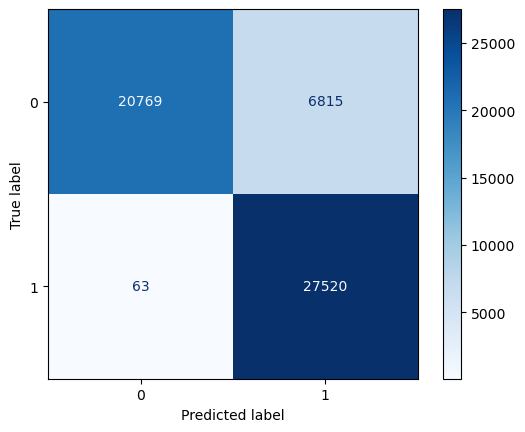

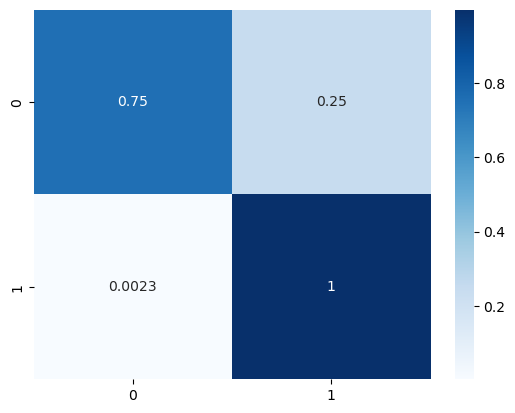

In [35]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)

supportvm.fit()

#### Random forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.8895535374408614
 The recall score is 0.846456439027536
 The f1 score is 0.8960185675034558
 The roc score is 0.8895546647629138

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     27584
           1       0.85      0.95      0.90     27583

    accuracy                           0.89     55167
   macro avg       0.90      0.89      0.89     55167
weighted avg       0.90      0.89      0.89     55167




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.94462194 0.94661591 0.9478848  0.94552829 0.94743163]

Mean cross validation score: 0.9464165136923812



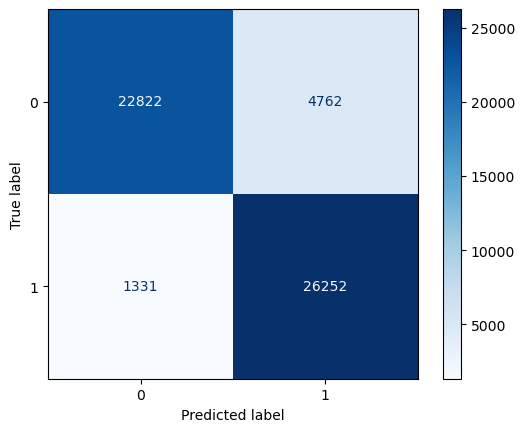

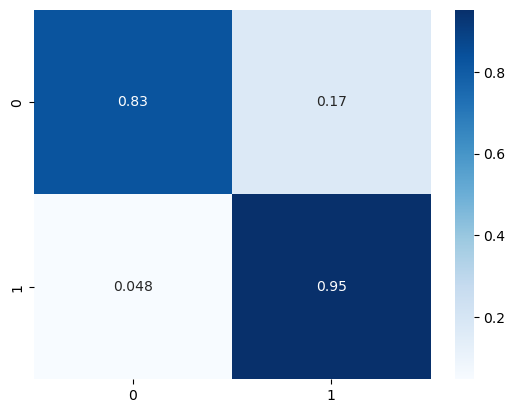

In [36]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

## Original Dataset test

In [2]:
dftest = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/OG.csv')
dftest.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [3]:
dftest.shape

(338171, 6)

### ADASYN

In [4]:
dftest1 = dftest.copy()

dftest1 = dp.OverallProcessor(dftest1).adasyn()
dftest1.shape

(588912, 6)

In [ ]:
scsplit = dp.scalesplit(dftest1)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### Log Regression

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)

supportvm.fit()

#### Random Forest

In [ ]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

### RandomUnderSampler

In [4]:
dftest2 = dftest.copy()

dftest2 = dp.OverallProcessor(dftest2).rus()
dftest2.shape
xdf2 = dftest2.drop(['is_hazardous'], axis=1)
ydf2 = dftest2['is_hazardous']

In [7]:
ydf2.head()

0    0
1    0
2    0
3    0
4    0
Name: is_hazardous, dtype: int64

In [8]:
scsplit = dp.scalesplit(dftest2)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_trainpd = pd.DataFrame(X_train, columns=xdf2.columns)
X_testpd = pd.DataFrame(X_test, columns=xdf2.columns)
y_trainpd = pd.DataFrame(y_train, columns=['is_hazardous'])
y_testpd = pd.DataFrame(y_test, columns=['is_hazardous'])


#### Log Regression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is 0.8061395887633942
 The recall score is 0.7419384474046854
 The f1 score is 0.8283501718036822
 The roc score is 0.8064205936163417

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      8651
           1       0.74      0.94      0.83      8614

    accuracy                           0.81     17265
   macro avg       0.83      0.81      0.80     17265
weighted avg       0.83      0.81      0.80     17265




/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross validation score: [0.20445974 0.23486797 0.22617987 0.23631599 0.21946255]

Mean cross validation score: 0.22425722487904168



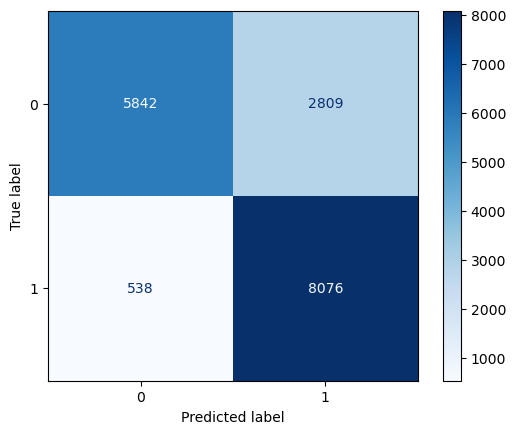

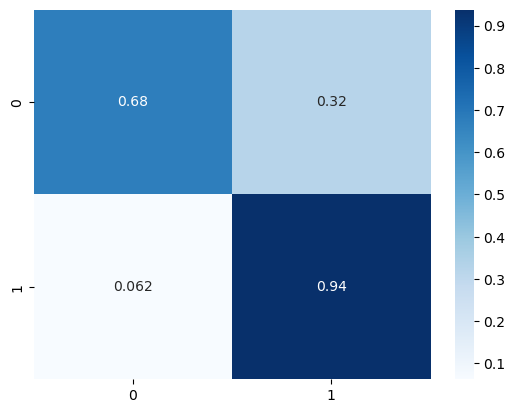

In [13]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)

supportvm.fit()

In [ ]:
svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')

bestsvm = svm
bestsvm.fit(X_train, y_train)

predictionsvm = bestsvm.predict(X_test)

accuracysvm = accuracy_score(y_test, predictionsvm)
recallsvm = recall_score(y_test, predictionsvm)
f1svm = f1_score(y_test, predictionsvm)

print(f"Accuracy: {accuracysvm}")
print(f"Recall: {recallsvm}")
print(f"F1 score: {f1svm}")


print(f'Classification Report: \n {classification_report(y_test, predictionsvm)}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forest

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.869794381697075
 The recall score is 0.8294348996067067
 The f1 score is 0.8769971547384549
 The roc score is 0.8699238700781917

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      8651
           1       0.83      0.93      0.88      8614

    accuracy                           0.87     17265
   macro avg       0.88      0.87      0.87     17265
weighted avg       0.88      0.87      0.87     17265




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.4558354  0.46162739 0.46799866 0.48161002 0.48157253]

Mean cross validation score: 0.46972880036336145



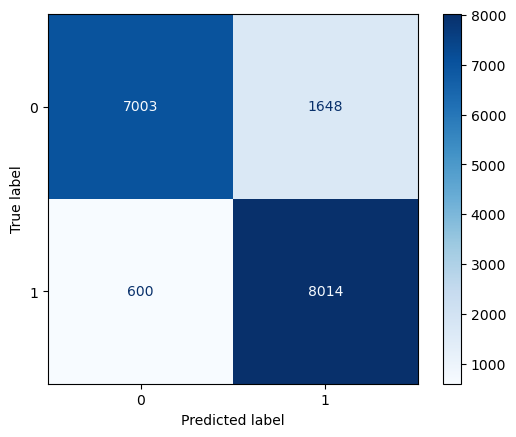

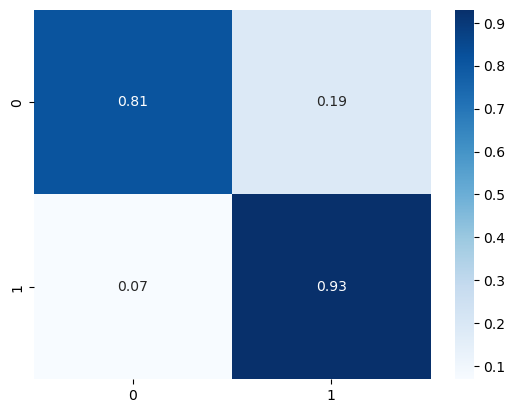

In [24]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

### SMOTE

In [ ]:
dftest2 = dftest.copy()

dftest2 = dp.OverallProcessor(dftest1).smote()
dftest2.shape

In [ ]:
scsplit = dp.scalesplit(dftest2)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### Log Regression

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

#### Support Vector Machine

In [ ]:
supportvm = dp.supportvm2(X_train, X_test, y_train, y_test)

supportvm.fit()

#### Random Forest

In [ ]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()

## Combined Dataframes

In [54]:
dftest1 = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/OG.csv')
dftest2 = dftest.copy()
dftest3 = pd.concat([dftest1, dftest2], ignore_index=True)

dftest3.shape

(488635, 6)

In [55]:
dftest3 = dp.OverallProcessor(dftest3).rus()
dftest3.shape

(111420, 6)

In [56]:
scsplit = dp.scalesplit(dftest3)
X_train, X_test, y_train, y_test = scsplit.ttsplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89136, 5), (22284, 5), (89136,), (22284,))

The accuracy score is 0.8339167115419135
 The recall score is 0.7610437495568319
 The f1 score is 0.8529423451345015
 The roc score is 0.8348633231640123

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     11220
           1       0.76      0.97      0.85     11064

    accuracy                           0.83     22284
   macro avg       0.86      0.83      0.83     22284
weighted avg       0.86      0.83      0.83     22284


Cross validation score: [0.31927086 0.34840214 0.33852944 0.33067616 0.3531141 ]

Mean cross validation score: 0.3379985403389545



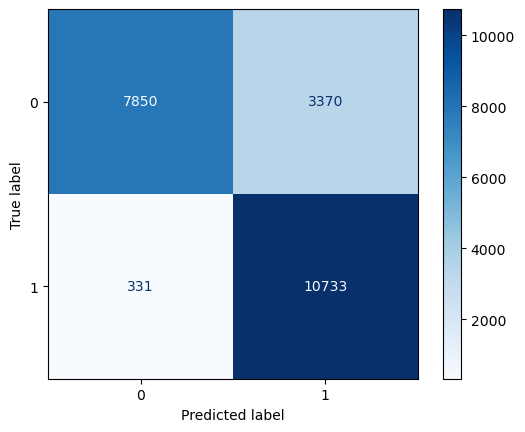

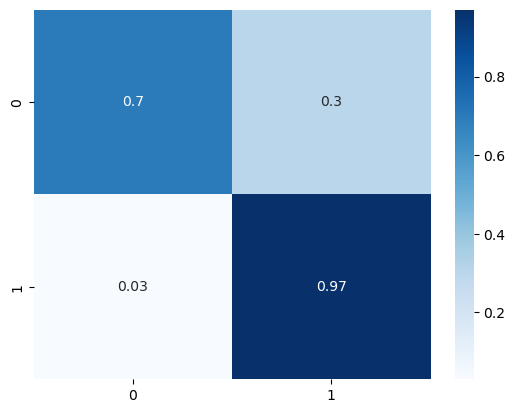

In [57]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.8953509244300843
 The recall score is 0.8558852298663189
 The f1 score is 0.900051431510372
 The roc score is 0.8957240517978045

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     11220
           1       0.86      0.95      0.90     11064

    accuracy                           0.90     22284
   macro avg       0.90      0.90      0.90     22284
weighted avg       0.90      0.90      0.90     22284




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [0.54184281 0.56717208 0.57076215 0.55348493 0.57053777]

Mean cross validation score: 0.5607599500644511



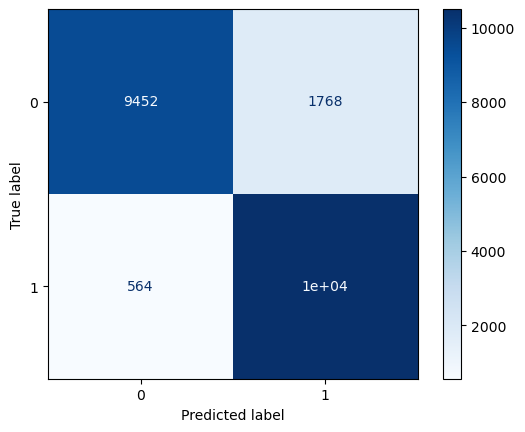

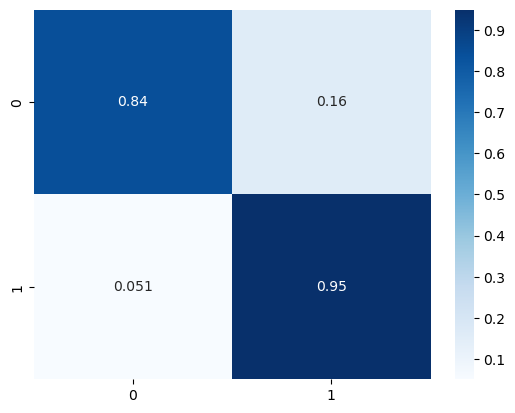

In [58]:
randomforest = dp.RandomForest(X_train, X_test, y_train, y_test)

randomforest.fit()